# Using the sound card to play and record audio

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import sounddevice as sd

In [3]:
# Define a function to plot the first 1000 points of a wave
def plot_wave(t,w):
    # Plot first thousand points as V vs ms
    plt.plot(t,w)
    plt.xlabel('time [ms]')
    plt.ylabel('Amlitude [V]')
    plt.show() 

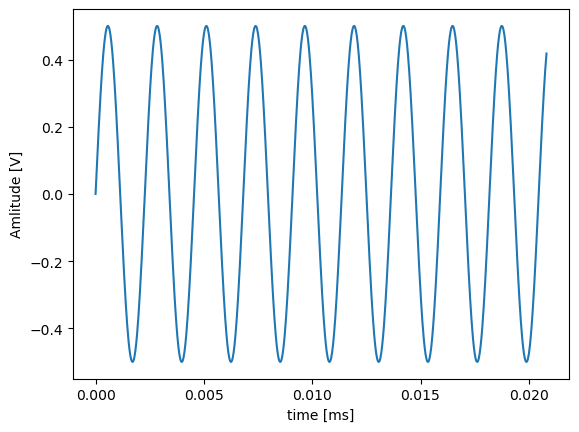

In [4]:
# Generate a sine wave
# Parameters
duration = 2.0       # seconds
frequency = 440.0    # Hz (A4)
sample_rate = 48000  # samples per second

# Generate time values. Endpoint = False gets the intervals right
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate a sine wave.  The audio player has a maximum amplitude of -1. to 1.
wave = 0.5 * np.sin(2 * np.pi * frequency * t)

#Plot first thousand points
plot_wave(t[:1000],wave[:1000])

# Play audio
Audio(wave, rate=sample_rate)

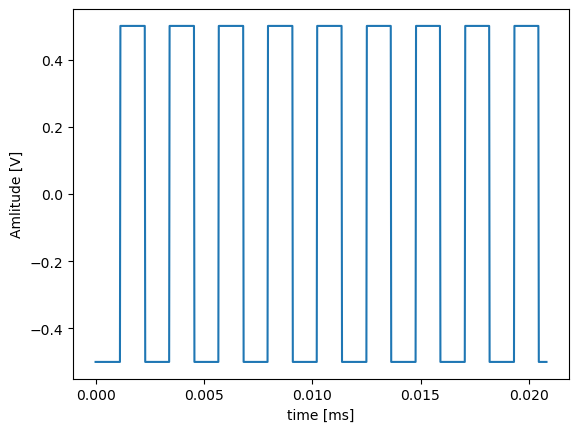

In [6]:
# Now let's try a square wave
def square_wave(x):
    y = np.empty(len(x))
    y[x%(2*np.pi)<=np.pi] = -1.
    y[x%(2*np.pi)>np.pi] = 1.
    return y

wave = 0.5*square_wave(2 * np.pi * frequency * t)

# Plot first thousand points
plot_wave(t[:1000],wave[:1000])
Audio(wave, rate=sample_rate)

# Recording Example

Note that it normally records in stereo, but we'll record in mono

In [7]:
import sounddevice as sd

# List all available audio devices
print(sd.query_devices())

# Or list only input-capable devices
devices = sd.query_devices()
devuse = 'HD Pro Webcam C920'
for i, dev in enumerate(devices):
    if dev['max_input_channels'] > 0:
        devname = dev['name']
        print(f"{i}: {devname}  (inputs: {dev['max_input_channels']})")
        if devname == devuse:
            devnum = i

if devnum:
    print(f'Using device number {devnum}')
else:
    print(f'Device {devuse} not found!')

  0 Crestron, Core Audio (0 in, 2 out)
  1 iPhone Microphone, Core Audio (1 in, 0 out)
> 2 HD Pro Webcam C920, Core Audio (2 in, 0 out)
  3 MacBook Pro Microphone, Core Audio (1 in, 0 out)
< 4 MacBook Pro Speakers, Core Audio (0 in, 2 out)
  5 Microsoft Teams Audio, Core Audio (1 in, 1 out)
  6 RemotePCMic, Core Audio (2 in, 2 out)
  7 RemotePCSound, Core Audio (2 in, 2 out)
1: iPhone Microphone  (inputs: 1)
2: HD Pro Webcam C920  (inputs: 2)
3: MacBook Pro Microphone  (inputs: 1)
5: Microsoft Teams Audio  (inputs: 1)
6: RemotePCMic  (inputs: 2)
7: RemotePCSound  (inputs: 2)
Using device number 2


Recording...
Done recording
(192000, 1)
(192000,)


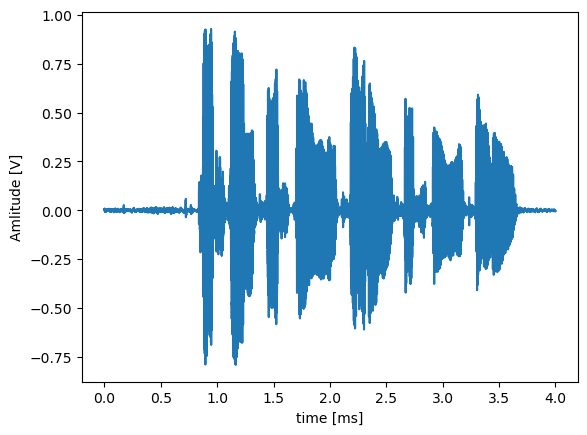

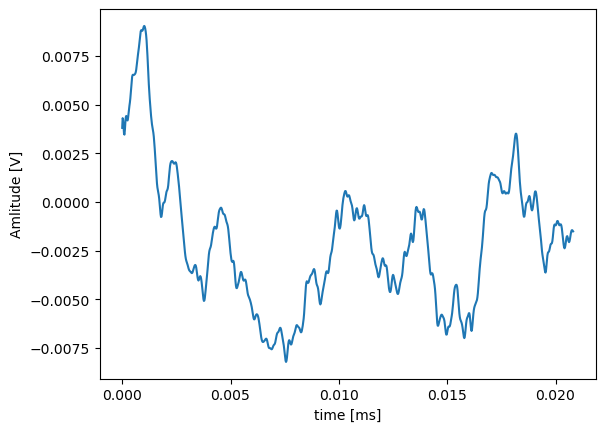

In [8]:
duration = 4
sample_rate = 48000.

print("Recording...")
# Record a single channel
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32',device=devnum)
sd.wait()
print("Done recording")

# flatten into 1D
print(audio.shape)
audio = audio.flatten()
print(audio.shape)

# Create a time array
t = np.arange(len(audio))/sample_rate

# Plot in the time domain
plot_wave(t,audio)

# Plot first 1000 points
plot_wave(t[:1000],audio[:1000])

Audio(audio, rate=sample_rate)   # note the transpose for stereo